In [218]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [219]:
elec_file=pd.read_csv('elec00.csv',header=3)
elec=pd.DataFrame(elec_file)
heat_file=pd.read_csv('heat00.csv',header=3)
heat=pd.DataFrame(heat_file)

Start electricity analysis

In [220]:
elec.shape

(1785, 53)

In [221]:
heat.shape

(1694, 53)

delete null rows

In [222]:
elec=elec.dropna()
elec.shape


(1779, 53)

In [223]:
heat=heat.dropna()
heat.shape

(1687, 53)

delete rows when 'Total==0'

In [224]:
rows=elec[elec['Total']=='0.0'].index
elec=elec.drop(index=rows)

In [225]:
rows=elec[elec['Total']=='0'].index
elec.iloc[rows]
elec=elec.drop(index=rows)
elec=elec.reset_index()
elec.shape


(695, 54)

In [226]:
rows=heat[heat['Total']=='0.0'].index
heat=heat.drop(index=rows)
rows=heat[heat['Total']=='0'].index
heat=heat.drop(index=rows)
heat=heat.reset_index()
heat.shape

(710, 54)

delete rows with invalid value in the period

In [229]:
raws=[]
y_elec=[]
x_elec=[]
y_heat=[]
x_heat=[]
for i in range(elec.shape[0]):    
    try:
        y_elec.append(float(elec.iloc[i]['Total']))
        x_elec.append(elec.iloc[i]['Date'])
        #print(elec.iloc[i]['Total'])
    except:
        raws.append(i)
        print("break",i)
        continue
for i in range(heat.shape[0]):
    try:
        y_heat.append(float(heat.iloc[i]['Total']))
        x_heat.append(heat.iloc[i]['Date'])
    except:
        raws.append(i)
        print("break",i)
        continue

        

break 200
break 201
break 202
break 203
break 204
break 543
break 339


In [105]:
elec.iloc[raws]

,index,Site Name,Utility,Unit,Date,00:00,00:30,01:00,01:30,02:00,...,19:30,20:00,20:30,21:00,21:30,22:00,22:30,23:00,23:30,Total
200,201,Cockspur Street,Electricity,kWh,2011-02-02,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0E
201,202,Cockspur Street,Electricity,kWh,2011-02-03,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0E
202,203,Cockspur Street,Electricity,kWh,2011-02-04,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0E
203,204,Cockspur Street,Electricity,kWh,2011-02-05,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0E
204,205,Cockspur Street,Electricity,kWh,2011-02-06,0.0,0.0,0.0,0.0,0.0,...,75.0,80.0,75.0,65.0,75.0,65.0,70.0,70.0,70.0,25710E
543,556,2-4 Cockspur Street,Electricity,kWh,2012-01-22,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,29580.0E
339,341,2-4 Cockspur Street,Electricity,kWh,2011-06-21,65.0,70.0,75.0,75.0,70.0,...,100.0,100.0,95.0,85.0,75.0,75.0,75.0,75.0,75.0,6015


In [230]:
elec=elec.drop(index=raws)
elec.shape

(688, 54)

In [231]:
heat=heat.drop(index=raws)
heat.shape


(703, 54)

remove the largest data

In [109]:
maxmum=np.max(y_heat)
x_heat.remove(x_heat[y_heat.index(maxmum)])
y_heat.remove(maxmum)

maxmum=np.max(y_heat)

In [110]:
import plotly.graph_objects as go
import pandas as pd
import numpy as np

fig = go.Figure()

fig.add_trace(
    go.Scatter(x=x_elec,
               y=y_elec,
               name="Electricity - kWh",
               line=dict(color="#33CFA5")))
fig.add_trace(
    go.Scatter(x=x_elec,
               y=[np.mean(y_elec)]*len(x_elec),
               name="Electricity Average -kWh",
               #visible=False,
               line=dict(color="#33CFA5",dash="dash")))
fig.add_trace(
    go.Scatter(x=x_heat,
               y=y_heat,
               name="Heating - kWh",
               line=dict(color="#F06A6A")))
fig.add_trace(
    go.Scatter(x=x_heat,
               y=[np.mean(y_heat)]*len(x_heat),
               name="Heating Average - kWh",
               #visible=False,
               line=dict(color="#F06A6A", dash="dash")))


# Add Annotations and Buttons
maxmum=np.max(y_elec)
minmun=np.min(y_elec)
high_annotations = [dict(x=x_elec[y_elec.index(maxmum)],
                         y=maxmum,
                         xref="x", yref="y",
                         text="Electricity Max:<br> %.2f" % maxmum,
                         ax=0, ay=-40),
                    dict(x=x_elec[y_elec.index(minmun)],
                         y=minmun,
                         xref="x", yref="y",
                         text="Electricity Min:<br> %.2f" % minmun,
                         ax=0, ay=-40),
                    dict(x=x_elec[1],
                         y=np.mean(y_elec),
                         xref="x", yref="y",
                         text="Average:<br> %.2f" % np.mean(y_elec),
                         ax=0, ay=-40)]
maxmum=np.max(y_heat)
minmun=np.min(y_heat)

low_annotations = [dict(x=x_heat[y_heat.index(maxmum)],
                         y=maxmum,
                         xref="x", yref="y",
                         text="Electricity Max:<br> %.2f" % maxmum,
                         ax=0, ay=-40),
                    dict(x=x_heat[y_heat.index(minmun)],
                         y=minmun,
                         xref="x", yref="y",
                         text="Electricity Min:<br> %.2f" % minmun,
                         ax=0, ay=-40),
                   dict(x=x_heat[1],
                         y=np.mean(y_heat),
                         xref="x", yref="y",
                         text="Average:<br> %.2f" % np.mean(y_heat),
                         ax=0, ay=-40)]

all_annotations = [dict(x=x_elec[1],
                         y=np.mean(y_elec),
                         xref="x", yref="y",
                         text="Electricity,Average:<br> %.2f" % np.mean(y_elec),
                         ax=0, ay=-40),
                   dict(x=x_heat[-2],
                         y=np.mean(y_heat),
                         xref="x", yref="y",
                         text="Heating Average:<br> %.2f" % np.mean(y_heat),
                         ax=0, ay=-40)]


fig.update_layout(
    updatemenus=[
        dict(
            type="buttons",
            direction="right",
            active=0,
            x=1.57,
            y=1.2,
            buttons=list([
                dict(label="Both",
                     method="update",
                     args=[{"visible": [True, True, True, True]},
                           {"title": "DCMS live data on electricty and heating",
                            "annotations":all_annotations
                           }]),
                dict(label="Electricity",
                     method="update",
                     args=[{"visible": [True, True, False,False]},
                           {"title": "DCMS Electricity"
                            ,"annotations": high_annotations
                           }]),
                dict(label="Heating",
                     method="update",
                     args=[{"visible": [False,False,True,True]},
                           {"title": "DCMS Heating",
                            "annotations": low_annotations
                           }])
            ]),
        )
    ])

# Set title
fig.update_layout(
    title_text="DCMS live data on electricty and gas consumption",
    xaxis_domain=[0.05, 1.0]
)

fig.show()



Start to make weekday analysis

In [15]:
elec_new={'Date':x_elec,'Total':y_elec}
elec_new=pd.DataFrame(elec_new)

In [16]:
heat_new={'Date':x_heat,'Total':y_heat}
heat_new=pd.DataFrame(heat_new)

In [17]:
elec_new.head()

,Date,Total
0,2010-07-16,6350.0
1,2010-07-17,3500.0
2,2010-07-18,3490.0
3,2010-07-19,6875.0
4,2010-07-20,6915.0


In [18]:
heat_new.head()

,Date,Total
0,2010-10-21,15610.0
1,2010-10-22,11080.0
2,2010-10-23,12700.0
3,2010-10-24,14740.0
4,2010-10-25,15660.0


In [19]:
date=elec_new['Date']
timeset=pd.to_datetime(date)
weekday=[]
for i in timeset:
    weekday.append(i.weekday())
elec_new['Weekday']=weekday

In [20]:
date=heat_new['Date']
timeset=pd.to_datetime(date)
weekday=[]
for i in timeset:
    weekday.append(i.weekday())
heat_new['Weekday']=weekday

In [21]:
elec_new.groupby('Weekday').describe()

Total                                                             \
         count         mean         std     min      25%     50%      75%   
Weekday                                                                     
0         99.0  5706.212121  807.291014  3250.0  5485.00  5885.0  6205.00   
1        100.0  5846.905000  568.232052  3720.0  5613.75  5865.0  6177.50   
2         97.0  5947.850515  483.671059  4369.5  5590.00  5905.0  6230.00   
3         97.0  5836.788660  699.448100   620.0  5555.00  5852.5  6135.00   
4         99.0  5602.272727  810.399556   565.0  5425.00  5700.0  5987.50   
5         99.0  3535.621212  379.106476   560.0  3400.00  3585.0  3700.00   
6         98.0  3478.653061  428.683007    10.0  3345.00  3527.5  3643.75   

                 
            max  
Weekday          
0        7105.0  
1        7025.0  
2        7090.0  
3        7415.0  
4        7020.0  
5        4255.0  
6        4080.0

In [22]:
heat_new.groupby('Weekday').describe()

Total                                                           \
         count         mean           std  min     25%     50%      75%   
Weekday                                                                   
0        104.0  5570.519231   7341.111080  1.0  1316.0  1869.0   8185.0   
1        100.0  5476.870000   7206.569615  1.0  1201.5  1749.0   8947.5   
2        104.0  6831.740385  17602.938485  1.0  1359.0  1742.5   9025.0   
3        105.0  5002.685714   6657.488375  1.0  1321.0  1709.0   7450.0   
4        106.0  5094.528302   7008.954031  1.0  1230.0  1674.0   6087.5   
5         97.0  4837.030928   6716.742716  1.0  1027.0  1436.0   8320.0   
6         93.0  5380.161290   7244.170715  1.0  1030.0  1573.0  10000.0   

                   
              max  
Weekday            
0         27480.0  
1         25330.0  
2        171078.0  
3         25340.0  
4         26170.0  
5         27220.0  
6         26440.0

Text(0.5, 1.0, 'Electricity on weekdays')

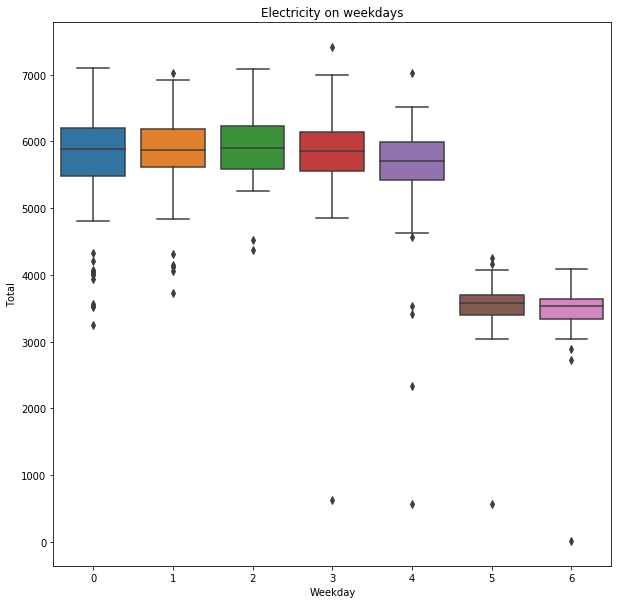

In [113]:
tips = sns.load_dataset('tips')
fig=plt.figure(figsize=[10,10])
sns.boxplot(data=elec_new,x='Weekday',y='Total')
plt.title("Electricity on weekdays")

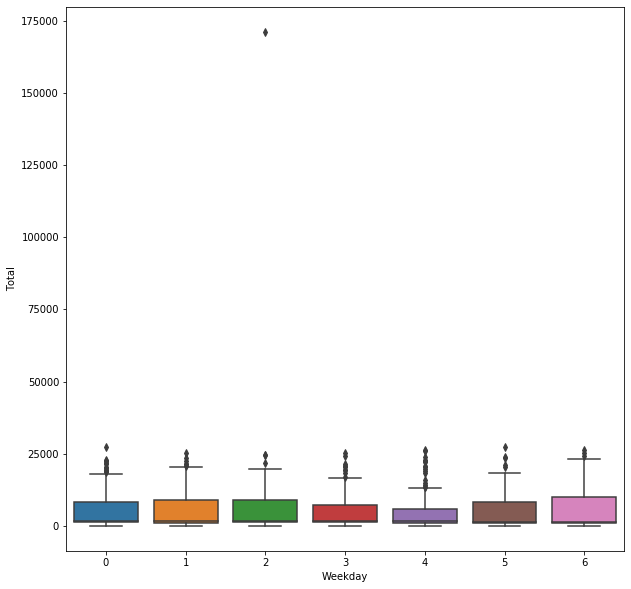

In [24]:
fig=plt.figure(figsize=[10,10])
sns.boxplot(data=heat_new,x='Weekday',y='Total')

Text(0.5, 1.0, 'Heating on weekdays')

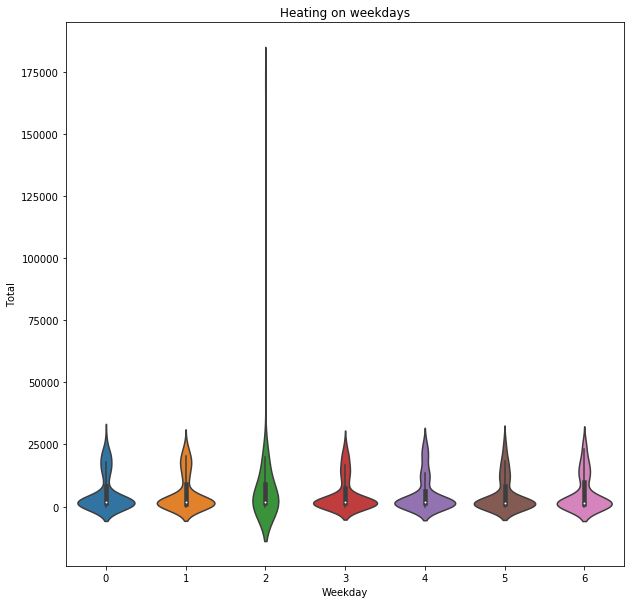

In [26]:
fig=plt.figure(figsize=[10,10])
sns.violinplot(data=heat_new,x='Weekday',y='Total')
plt.title("Heating on weekdays")

remove the largest value

In [27]:
heat_new.shape
heat_new2=heat_new.drop(heat_new["Total"].idxmax())
heat_new2.shape

(708, 3)

Text(0.5, 1.0, 'Heating on weekdays')

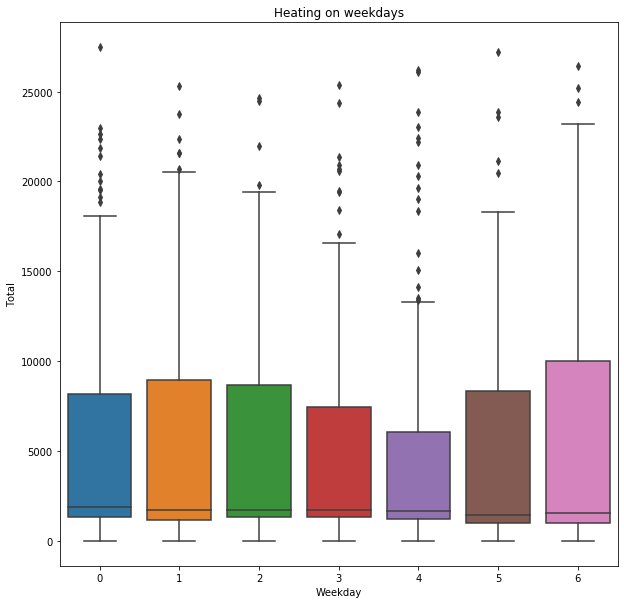

In [114]:
fig=plt.figure(figsize=[10,10])
sns.boxplot(data=heat_new2,x='Weekday',y='Total')
plt.title("Heating on weekdays")


Start to make month analysis

In [29]:
date=elec_new['Date']
timeset=pd.to_datetime(date)
month=[]
year=[]
day=[]
for i in timeset:
    year.append(i.year)
    if len(str(i.month))==1:month.append('0'+str(i.month))
    else:month.append(str(i.month))
    day.append(i.day)
elec_new['Year']=year
elec_new['Month']=month
elec_new['Day']=day
elec_new['temp']=elec_new['Year'].map(str)+'-'+elec_new['Month'].map(str)
elec_new['sort']=elec_new['Year'].map(str)+elec_new['Month'].map(str)
elec_new['sort']=elec_new['sort'].map(int)
elec_new.head()

,Date,Total,Weekday,Year,Month,Day,temp,sort
0,2010-07-16,6350.0,4,2010,07,16,2010-07,201007
1,2010-07-17,3500.0,5,2010,07,17,2010-07,201007
2,2010-07-18,3490.0,6,2010,07,18,2010-07,201007
3,2010-07-19,6875.0,0,2010,07,19,2010-07,201007
4,2010-07-20,6915.0,1,2010,07,20,2010-07,201007


In [169]:
date=heat_new2['Date']
timeset=pd.to_datetime(date)
month=[]
year=[]
day=[]
for i in timeset:
    year.append(i.year)
    if len(str(i.month))==1:month.append('0'+str(i.month))
    else:month.append(str(i.month))
    day.append(i.day)
heat_new2['Year']=year
heat_new2['Month']=month
heat_new2['Day']=day
heat_new2['temp']=heat_new2['Year'].map(str)+'-'+heat_new2['Month'].map(str)
heat_new2['sort']=heat_new2['Year'].map(str)+heat_new2['Month'].map(str)
heat_new2['sort']=heat_new2['sort'].map(int)
heat_new2.head()

,Date,Total,Weekday,Year,Month,Day,temp,sort
0,2010-10-21,15610.0,3,2010,10,21,2010-10,201010
1,2010-10-22,11080.0,4,2010,10,22,2010-10,201010
2,2010-10-23,12700.0,5,2010,10,23,2010-10,201010
3,2010-10-24,14740.0,6,2010,10,24,2010-10,201010
4,2010-10-25,15660.0,0,2010,10,25,2010-10,201010


In [31]:
groupby_elec=elec_new.groupby("temp").mean().sort_values("sort")
groupby_elec=groupby_elec.reset_index()
groupby_elec


,temp,Total,Weekday,Year,Day,sort
0,2010-07,5583.750000,3.187500,2010.0,23.500000,201007.0
1,2010-08,5239.838710,2.935484,2010.0,16.000000,201008.0
2,2010-09,5030.833333,2.966667,2010.0,15.500000,201009.0
3,2010-10,4814.833333,3.100000,2010.0,16.433333,201010.0
4,2010-11,4829.166667,2.833333,2010.0,15.500000,201011.0
5,2010-12,4793.870968,3.000000,2010.0,16.000000,201012.0
6,2011-01,4907.741935,3.064516,2011.0,16.000000,201101.0
7,2011-02,4951.086957,2.782609,2011.0,16.782609,201102.0
8,2011-03,4970.468750,2.968750,2011.0,16.312500,201103.0
9,2011-04,4589.833333,3.100000,2011.0,15.500000,201104.0


In [170]:
groupby_heat=heat_new2.groupby("temp").mean().sort_values("sort")
groupby_heat=groupby_heat.reset_index()
groupby_heat

,temp,Total,Weekday,Year,Day,sort
0,2010-10,12342.727273,3.545455,2010.0,26.000000,201010.0
1,2010-11,14904.000000,2.833333,2010.0,15.500000,201011.0
2,2010-12,22451.290323,3.000000,2010.0,16.000000,201012.0
3,2011-01,18045.806452,3.064516,2011.0,16.000000,201101.0
4,2011-02,15930.071429,3.000000,2011.0,14.500000,201102.0
5,2011-03,15619.428571,3.000000,2011.0,14.500000,201103.0
6,2011-04,9180.333333,3.000000,2011.0,14.700000,201104.0
7,2011-05,1112.727273,2.863636,2011.0,12.500000,201105.0
8,2011-06,10.000000,4.200000,2011.0,18.600000,201106.0
9,2011-07,10.000000,2.000000,2011.0,17.666667,201107.0


In [42]:
grouptemp=groupby_elec.groupby("Year").sum()
grouptemp

,Total,Weekday,Day,sort,Per
Year,,,,,
2010.0,30292.293011,18.022984,102.933333,1206057.0,0.860576
2011.0,61736.693737,36.012679,190.682840,2413278.0,0.935630
2012.0,36302.516129,20.800845,97.447619,1408428.0,1.000000


In [171]:
grouptemp2=groupby_heat.groupby("Year").sum()
grouptemp2

,Total,Weekday,Day,sort
Year,,,,
2010.0,49698.017595,9.378788,57.500000,603033.0
2011.0,63710.415752,34.077308,179.252381,2212169.0
2012.0,7201.504172,25.022026,124.541775,1609636.0
2013.0,4161.127586,13.591954,76.714943,805242.0
2014.0,5836.465476,15.490897,94.392051,1208421.0
2015.0,5628.765873,9.925926,58.500000,604506.0


In [134]:
groupby_elec.loc[:6,"Per"]=groupby_elec.loc[:6,'Total']/(groupby_elec.loc[:6,"Total"].sum()/6*12)
groupby_elec.loc[6:18,"Per"]=groupby_elec.loc[6:18,'Total']/groupby_elec.loc[6:18,"Total"].sum()
groupby_elec.loc[18:25,"Per"]=groupby_elec.loc[18:25,'Total']/(groupby_elec.loc[18:25,"Total"].sum()/7*12)
groupby_elec


,temp,Total,Weekday,Year,Day,sort,Per
0,2010-07,5583.750000,3.187500,2010.0,23.500000,201007.0,0.079315
1,2010-08,5239.838710,2.935484,2010.0,16.000000,201008.0,0.074429
2,2010-09,5030.833333,2.966667,2010.0,15.500000,201009.0,0.071461
3,2010-10,4814.833333,3.100000,2010.0,16.433333,201010.0,0.068392
4,2010-11,4829.166667,2.833333,2010.0,15.500000,201011.0,0.068596
5,2010-12,4793.870968,3.000000,2010.0,16.000000,201012.0,0.068095
6,2011-01,4907.741935,3.064516,2011.0,16.000000,201101.0,0.074378
7,2011-02,4951.086957,2.782609,2011.0,16.782609,201102.0,0.075035
8,2011-03,4970.468750,2.968750,2011.0,16.312500,201103.0,0.075328
9,2011-04,4589.833333,3.100000,2011.0,15.500000,201104.0,0.069560


In [172]:
groupby_heat.loc[:3,"Per"]=groupby_heat.loc[:3,'Total']/groupby_heat.loc[:3,"Total"].sum()
groupby_heat.loc[3:14,"Per"]=groupby_heat.loc[3:14,'Total']/groupby_heat.loc[3:14,"Total"].sum()
groupby_heat.loc[14:22,"Per"]=groupby_heat.loc[14:22,'Total']/groupby_heat.loc[14:22,"Total"].sum()
groupby_heat.loc[22:26,"Per"]=groupby_heat.loc[22:26,'Total']/groupby_heat.loc[22:26,"Total"].sum()
groupby_heat.loc[26:32,"Per"]=groupby_heat.loc[26:32,'Total']/groupby_heat.loc[26:32,"Total"].sum()
groupby_heat.loc[32:35,"Per"]=groupby_heat.loc[32:35,'Total']/groupby_heat.loc[32:35,"Total"].sum()
groupby_heat


,temp,Total,Weekday,Year,Day,sort,Per
0,2010-10,12342.727273,3.545455,2010.0,26.000000,201010.0,0.182197
1,2010-11,14904.000000,2.833333,2010.0,15.500000,201011.0,0.220005
2,2010-12,22451.290323,3.000000,2010.0,16.000000,201012.0,0.331415
3,2011-01,18045.806452,3.064516,2011.0,16.000000,201101.0,0.275971
4,2011-02,15930.071429,3.000000,2011.0,14.500000,201102.0,0.243616
5,2011-03,15619.428571,3.000000,2011.0,14.500000,201103.0,0.238865
6,2011-04,9180.333333,3.000000,2011.0,14.700000,201104.0,0.140393
7,2011-05,1112.727273,2.863636,2011.0,12.500000,201105.0,0.017017
8,2011-06,10.000000,4.200000,2011.0,18.600000,201106.0,0.000153
9,2011-07,10.000000,2.000000,2011.0,17.666667,201107.0,0.000153


In [147]:
groupby_elec.loc[:,'Per']=groupby_elec.loc[:,'Total']/groupby_elec.loc[:,"Total"].sum()*100
groupby_elec

,temp,Total,Weekday,Year,Day,sort,Per
0,2010-07,5583.750000,3.187500,2010.0,23.500000,201007.0,4.351036
1,2010-08,5239.838710,2.935484,2010.0,16.000000,201008.0,4.083049
2,2010-09,5030.833333,2.966667,2010.0,15.500000,201009.0,3.920186
3,2010-10,4814.833333,3.100000,2010.0,16.433333,201010.0,3.751872
4,2010-11,4829.166667,2.833333,2010.0,15.500000,201011.0,3.763041
5,2010-12,4793.870968,3.000000,2010.0,16.000000,201012.0,3.735537
6,2011-01,4907.741935,3.064516,2011.0,16.000000,201101.0,3.824269
7,2011-02,4951.086957,2.782609,2011.0,16.782609,201102.0,3.858045
8,2011-03,4970.468750,2.968750,2011.0,16.312500,201103.0,3.873148
9,2011-04,4589.833333,3.100000,2011.0,15.500000,201104.0,3.576545


In [173]:
groupby_heat.loc[:,"Per"]=groupby_heat.loc[:,'Total']/groupby_heat.loc[:,"Total"].sum()*100
groupby_heat


,temp,Total,Weekday,Year,Day,sort,Per
0,2010-10,12342.727273,3.545455,2010.0,26.000000,201010.0,9.059794
1,2010-11,14904.000000,2.833333,2010.0,15.500000,201011.0,10.939816
2,2010-12,22451.290323,3.000000,2010.0,16.000000,201012.0,16.479669
3,2011-01,18045.806452,3.064516,2011.0,16.000000,201101.0,13.245961
4,2011-02,15930.071429,3.000000,2011.0,14.500000,201102.0,11.692972
5,2011-03,15619.428571,3.000000,2011.0,14.500000,201103.0,11.464954
6,2011-04,9180.333333,3.000000,2011.0,14.700000,201104.0,6.738537
7,2011-05,1112.727273,2.863636,2011.0,12.500000,201105.0,0.816763
8,2011-06,10.000000,4.200000,2011.0,18.600000,201106.0,0.007340
9,2011-07,10.000000,2.000000,2011.0,17.666667,201107.0,0.007340


In [156]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)
x_Per=groupby_elec["Per"]
x_Value=groupby_elec['Total']
y=groupby_elec['temp']
fig.append_trace(go.Bar(
    x=x_Per,
    y=y,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Percentage of Electricity Consumption every month',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=x_Value, 
    y=y,
    mode='lines+markers',
    line_color='rgb(128, 0, 128)',
    name='Electricity Consumption every month',
), 1, 2)

fig.update_layout(
    title='Electricity Consumption',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []
x_p =np.round(x_Per,2)
x_nw = np.rint(x_Value)

for ydn, yd, xd in zip(x_p, x_nw, y):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, 
                            x=yd+200,
                            text='{:,}'.format(yd),
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, 
                            x=ydn+1,
                            text=str(ydn) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()



In [174]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)
x_Per=groupby_heat["Per"]
x_Value=groupby_heat['Total']

y=groupby_heat['temp']
#y=np.arange(len(x_Per))
fig.append_trace(go.Bar(
    x=x_Per,
    y=y,
    marker=dict(
        color='rgba(50, 171, 96, 0.6)',
        line=dict(
            color='rgba(50, 171, 96, 1.0)',
            width=1),
    ),
    name='Percentage of Electricity Consumption every month',
    orientation='h',
), 1, 1)

fig.append_trace(go.Scatter(
    x=x_Value, 
    y=y,
    mode='lines+markers',
    line_color='rgb(128, 0, 128)',
    name='Electricity Consumption every month',
), 1, 2)

fig.update_layout(
    title='Electricity Consumption',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []
x_p =np.round(x_Per,2)
x_nw = np.rint(x_Value)

for ydn, yd, xd in zip(x_p, x_nw, y):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2',
                            y=xd, 
                            x=yd+3000,
                            text='{:,}'.format(yd),
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, 
                            x=ydn+3,
                            text=str(ydn) + '%',
                            font=dict(family='Arial', size=12,
                                      color='rgb(50, 171, 96)'),
                            showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()



In [453]:
group=[]
temp=[]
for i in groupby.index:
    group.append(str(i[0])+str(i[1]))
    
elec_new["temp"]=elec_new['Year'].map(str)+elec_new['Month'].map(str)
elec_new.head()

,Date,Total,Weekday,Year,Month,temp
0,2010-07-16,6350.0,4,2010,7,20107
1,2010-07-17,3500.0,5,2010,7,20107
2,2010-07-18,3490.0,6,2010,7,20107
3,2010-07-19,6875.0,0,2010,7,20107
4,2010-07-20,6915.0,1,2010,7,20107


start to make year analysis

In [200]:
groupby=elec_new.groupby(['Year']).describe()
groupby

Total                                                              \
      count         mean          std     min      25%      50%     75%   
Year                                                                      
2010  168.0  5003.750000  1097.772888  3040.0  3607.50  5435.00  5712.5   
2011  357.0  5146.810924  1164.740191  2895.0  3700.00  5610.00  5975.0   
2012  164.0  5245.326220  1381.179116    10.0  3878.75  5891.25  6135.0   

             Weekday            ...            Month                           \
         max   count      mean  ...  75%  max  count      mean       std  min   
Year                            ...                                             
2010  6915.0   168.0  2.988095  ...  5.0  6.0  168.0  9.714286  1.620020  7.0   
2011  7080.0   357.0  3.008403  ...  5.0  6.0  357.0  6.577031  3.454817  1.0   
2012  7415.0   164.0  2.975610  ...  5.0  6.0  164.0  4.042683  1.717291  1.0   

                             
      25%   50%   75%   max  
Year                         
2010  8.0  10.0  11.0  12.0  
2011  4.0   7.0  10.0  12.0  
2012  3.0   4.0   5.0   7.0  

[3 rows x 24 columns]

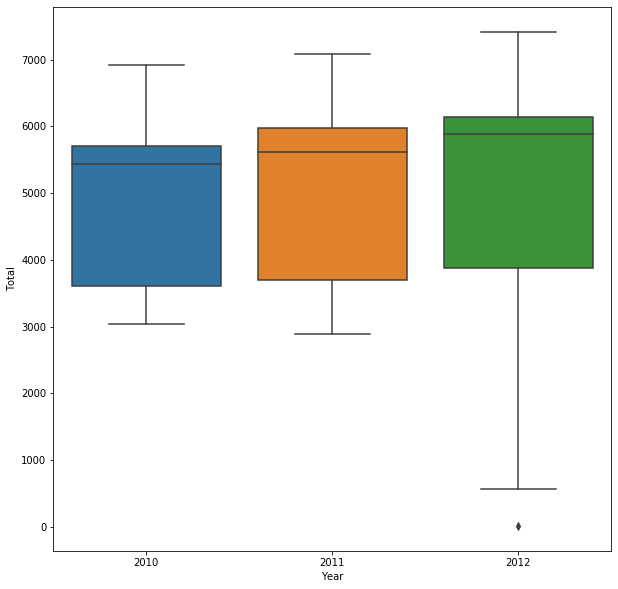

In [201]:
fig=plt.figure(figsize=[10,10])
sns.boxplot(data=elec_new,x='Year',y='Total')

start make plotly analysis

In [393]:
pip install plotly==4.6.0

     |████████████████████████████████| 7.1 MB 2.7 MB/s eta 0:00:01
  Created wheel for retrying: filename=retrying-1.3.3-py3-none-any.whl size=11429 sha256=3ddaa031893dd13b52dd95a8adbf323920e3fde8cd1728d5b435cee6661b261a
  Stored in directory: /Users/jessica/Library/Caches/pip/wheels/f9/8d/8d/f6af3f7f9eea3553bc2fe6d53e4b287dad18b06a861ac56ddf
Successfully built retrying
Note: you may need to restart the kernel to use updated packages.


In [417]:
pip install chart_studio

     |████████████████████████████████| 64 kB 2.8 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [439]:
groupby=elec_new.groupby(['Year','Month']).mean()
groupby=groupby.reset_index()
groupby['Index']=groupby['Year'].map(str)+'/'+groupby['Month'].map(str)
#groupby
y=groupby['Total']
x=groupby['Index']
x

0      2010/7
1      2010/8
2      2010/9
3     2010/10
4     2010/11
5     2010/12
6      2011/1
7      2011/2
8      2011/3
9      2011/4
10     2011/5
11     2011/6
12     2011/7
13     2011/8
14     2011/9
15    2011/10
16    2011/11
17    2011/12
18     2012/1
19     2012/2
20     2012/3
21     2012/4
22     2012/5
23     2012/6
24     2012/7
Name: Index, dtype: object

In [440]:
import plotly.graph_objs as go
import plotly
# Create a trace
trace = go.Scatter(
    x = x,
    y = y)
data=[trace]

plotly.offline.plot(data)

'temp-plot.html'

In [463]:
groupby=elec_new.groupby(['Year','Month']).mean()=groupby.reset_index()
groupby

,Year,Month,Total,Weekday
0,2010,7,5583.750000,3.187500
1,2010,8,5239.838710,2.935484
2,2010,9,5030.833333,2.966667
3,2010,10,4814.833333,3.100000
4,2010,11,4829.166667,2.833333
5,2010,12,4793.870968,3.000000
6,2011,1,4907.741935,3.064516
7,2011,2,4951.086957,2.782609
8,2011,3,4970.468750,2.968750
9,2011,4,4589.833333,3.100000


In [484]:
import plotly.graph_objs as go
import plotly
nullbox=[0]*6
data_2010=nullbox+list(groupby.loc[groupby['Year']==2010]['Total'])
data_2011=list(groupby.loc[groupby['Year']==2011]['Total'])
data_2012=list(groupby.loc[groupby['Year']==2012]['Total'])+nullbox
month = ['January', 'February', 'March', 'April', 'May', 'June', 'July',
         'August', 'September', 'October', 'November', 'December']

[0,
 0,
 0,
 0,
 0,
 0,
 5583.75,
 5239.8387096774195,
 5030.833333333333,
 4814.833333333333,
 4829.166666666667,
 4793.870967741936]

In [486]:
# Create a trace
fig = go.Figure()
# Create and style traces
fig.add_trace(go.Scatter(x=month, y=data_2010, name='2010',
                         line=dict(color='firebrick', width=4)))
fig.add_trace(go.Scatter(x=month, y=data_2011, name='2011',
                         line=dict(color='firebrick', width=4,dash='dash')))
fig.add_trace(go.Scatter(x=month, y=data_2012, name='2012',
                         line=dict(color='firebrick', width=4,dash='dot')))

fig.update_layout(title='2010-2012 Electricity Comsumption Per Month',
                   xaxis_title='Month',
                   yaxis_title='Electricity KWh')


fig.show()


In [487]:
groupby=elec_new.groupby(['Year']).describe()
groupby

Total                                                              \
      count         mean          std     min      25%      50%     75%   
Year                                                                      
2010  168.0  5003.750000  1097.772888  3040.0  3607.50  5435.00  5712.5   
2011  357.0  5146.810924  1164.740191  2895.0  3700.00  5610.00  5975.0   
2012  164.0  5245.326220  1381.179116    10.0  3878.75  5891.25  6135.0   

             Weekday            ...            Month                           \
         max   count      mean  ...  75%  max  count      mean       std  min   
Year                            ...                                             
2010  6915.0   168.0  2.988095  ...  5.0  6.0  168.0  9.714286  1.620020  7.0   
2011  7080.0   357.0  3.008403  ...  5.0  6.0  357.0  6.577031  3.454817  1.0   
2012  7415.0   164.0  2.975610  ...  5.0  6.0  164.0  4.042683  1.717291  1.0   

                             
      25%   50%   75%   max  
Year                         
2010  8.0  10.0  11.0  12.0  
2011  4.0   7.0  10.0  12.0  
2012  3.0   4.0   5.0   7.0  

[3 rows x 24 columns]

In [177]:
y1=elec_new.loc[elec_new['Year']==2010]['Total']
y2=elec_new.loc[elec_new['Year']==2011]['Total']
y3=elec_new.loc[elec_new['Year']==2012]['Total']


In [192]:
y1_h=heat_new2.loc[heat_new2['Year']==2011]['Total']
y2_h=heat_new2.loc[heat_new2['Year']==2012]['Total']
y3_h=heat_new2.loc[heat_new2['Year']==2013]['Total']
y4_h=heat_new2.loc[heat_new2['Year']==2014]['Total']
y5_h=heat_new2.loc[heat_new2['Year']==2015]['Total']

In [178]:
fig = go.Figure()
fig.add_trace(go.Box(y=y1,name='2010'))
fig.add_trace(go.Box(y=y2,name='2011'))
fig.add_trace(go.Box(y=y3,
    name='2012',
    boxpoints='suspectedoutliers',
    marker=dict(
        color='rgb(8,81,156)',
        outliercolor='rgba(219, 64, 82, 0.6)',                  
        line=dict(
            outliercolor='rgba(219, 64, 82, 0.6)',
            outlierwidth=2))
))
              
fig.show()

In [197]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)
x_Per=groupby_elec["Per"]
x_Value=groupby_elec['Total']
y=groupby_elec['temp']
fig.append_trace(go.Box(
    x=y1,
    name='Electricity consumption in 2010',
    orientation='h',
), 1, 2)

fig.append_trace(go.Box(
    x=y2,
    name='Electricity consumption in 2011',
    orientation='h',
), 1, 2)

fig.append_trace(go.Box(x=y3,name='Electricity consumption in 2012',
    orientation='h',
), 1, 2)

fig.append_trace(go.Scatter(
    x=x_Value, 
    y=y,
    mode='lines+markers',
    line_color='rgb(128, 0, 128)',
    name='Electricity Consumption every month',
), 1, 1)
fig.update_layout(
    title='Electricity Consumption',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []
x_p =np.round(x_Per,2)
x_nw = np.rint(x_Value)

for ydn, yd, xd in zip(x_p, x_nw, y):
    # labeling the scatter savings
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, 
                            x=yd+200,
                            text='{:,}'.format(yd),
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))
    # labeling the bar net worth
fig.update_layout(annotations=annotations)

fig.show()



In [198]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
fig = make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                    shared_yaxes=False, vertical_spacing=0.001)

x_Value=groupby_heat['Total']

y=groupby_heat['temp']
#y=np.arange(len(x_Per))

fig.append_trace(go.Box(
    x=y1_h,
    name='Gas Consumption in 2011',
    orientation='h',
), 1, 2)

fig.append_trace(go.Box(
    x=y2_h,
    name='Gas Consumption in 2012',
    orientation='h',
), 1, 2)

fig.append_trace(go.Box(
    x=y3_h,name='Gas Consumption in 2013',
    orientation='h',
), 1, 2)

fig.append_trace(go.Box(
    x=y4_h,
    name='Gas Consumption in 2014',
    orientation='h',
), 1, 2)

fig.append_trace(go.Box(
    x=y5_h,name='Gas Consumption in 2015',
    orientation='h',
), 1, 2)


fig.append_trace(go.Scatter(
    x=x_Value, 
    y=y,
    mode='lines+markers',
    line_color='rgb(128, 0, 128)',
    name='Gas Consumption every month',
), 1, 1)

fig.update_layout(
    title='Gas Consumption',
    yaxis=dict(
        showgrid=False,
        showline=False,
        showticklabels=True,
        domain=[0, 0.85],
    ),
    yaxis2=dict(
        showgrid=False,
        showline=True,
        showticklabels=False,
        linecolor='rgba(102, 102, 102, 0.8)',
        linewidth=2,
        domain=[0, 0.85],
    ),
    xaxis=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0, 0.42],
    ),
    xaxis2=dict(
        zeroline=False,
        showline=False,
        showticklabels=True,
        showgrid=True,
        domain=[0.47, 1],
        side='top',
    ),
    legend=dict(x=0.029, y=1.038, font_size=10),
    margin=dict(l=100, r=20, t=70, b=70),
    paper_bgcolor='rgb(248, 248, 255)',
    plot_bgcolor='rgb(248, 248, 255)',
)

annotations = []
x_p =np.round(x_Per,2)
x_nw = np.rint(x_Value)

for ydn, yd, xd in zip(x_p, x_nw, y):
    # labeling the scatter savings
    annotations.append(dict(xref='x1', yref='y1',
                            y=xd, 
                            x=yd+3000,
                            text='{:,}'.format(yd),
                            font=dict(family='Arial', size=12,
                                      color='rgb(128, 0, 128)'),
                            showarrow=False))

fig.update_layout(annotations=annotations)

fig.show()


start Inferential statistics

In [299]:
elec_new=elec.iloc[:,4:]
date=elec_new['Date']
timeset=pd.to_datetime(date)
year=[]
weekday=[]
month=[]
for i in timeset:
    year.append(i.year)
    weekday.append(i.weekday())
    month.append(i.month)
elec_new['Year']=year
elec_new['Weekday']=weekday
elec_new['Month']=month
elec_new=elec_new.iloc[:,1:]
elec_new["Total"]=elec_new["Total"].map(float)
elec_new[10:24]

,00:00,00:30,01:00,01:30,02:00,02:30,03:00,03:30,04:00,04:30,...,21:00,21:30,22:00,22:30,23:00,23:30,Total,Year,Weekday,Month
10,70.0,65.0,65.0,65.0,65.0,70.0,60.0,65.0,60.0,70.0,...,90.0,85.0,80.0,80.0,70.0,70.0,6645.0,2010,0,7
11,75.0,70.0,65.0,70.0,75.0,75.0,60.0,70.0,60.0,70.0,...,100.0,90.0,85.0,80.0,65.0,75.0,6885.0,2010,1,7
12,75.0,70.0,65.0,70.0,70.0,70.0,70.0,65.0,70.0,70.0,...,85.0,85.0,80.0,75.0,65.0,70.0,6530.0,2010,2,7
13,65.0,65.0,65.0,70.0,70.0,65.0,65.0,60.0,65.0,70.0,...,90.0,95.0,85.0,80.0,65.0,70.0,6320.0,2010,3,7
14,70.0,70.0,65.0,65.0,75.0,70.0,60.0,75.0,65.0,70.0,...,90.0,75.0,80.0,75.0,65.0,70.0,6135.0,2010,4,7
15,70.0,65.0,60.0,65.0,70.0,65.0,65.0,65.0,60.0,70.0,...,70.0,70.0,65.0,65.0,65.0,65.0,3430.0,2010,5,7
16,70.0,65.0,60.0,70.0,65.0,70.0,65.0,65.0,65.0,60.0,...,60.0,65.0,65.0,60.0,65.0,60.0,3350.0,2010,6,8
17,70.0,70.0,60.0,70.0,65.0,70.0,60.0,65.0,65.0,70.0,...,85.0,85.0,80.0,70.0,65.0,70.0,6255.0,2010,0,8
18,65.0,65.0,60.0,70.0,65.0,60.0,65.0,60.0,65.0,70.0,...,95.0,85.0,90.0,70.0,65.0,75.0,6080.0,2010,1,8
19,60.0,70.0,65.0,65.0,70.0,70.0,65.0,65.0,65.0,70.0,...,90.0,85.0,80.0,70.0,70.0,70.0,6110.0,2010,2,8


In [238]:
y1=elec_new.loc[elec_new['Year']==2010]['Total']
y2=elec_new.loc[elec_new['Year']==2011]['Total']
y3=elec_new.loc[elec_new['Year']==2012]['Total']

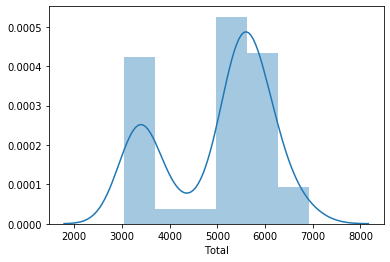

In [241]:
sns.distplot(y1)

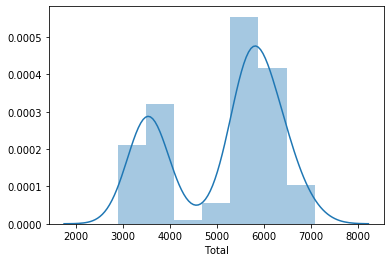

In [242]:
sns.distplot(y2)

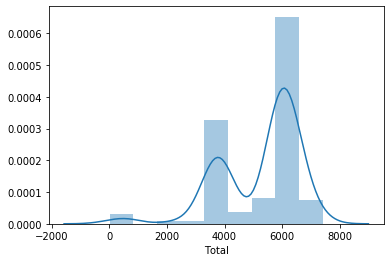

In [245]:
sns.distplot(y3)

In [285]:
import scipy
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm


In [324]:
#if len(testData) >300:
p_value= stats.kstest(elec_new["Total"],'norm')[1]
if p_value<0.05:
   print("data are not normal distributed")
else:
   print("data are normal distributed")
  

data are not normal distributed


In [325]:
y1=elec_new.loc[elec_new['Year']==2010]['Total']
y2=elec_new.loc[elec_new['Year']==2011]['Total']
y3=elec_new.loc[elec_new['Year']==2012]['Total']
leveneResult=scipy.stats.levene(y1,y2,y3)
p=leveneResult[1]
if p<0.05:
    print("variances of groups are not equal")
else:
    print("variances of groups are equal，p-Value:",p)

variances of groups are equal，p-Value: 0.3330070158076228


In [322]:
#y1=2010,y2=2011,y3=2012
y1=elec_new.loc[elec_new['Month']==7]['Total']
y2=elec_new.loc[elec_new['Month']==8]['Total']
y3=elec_new.loc[elec_new['Month']==9]['Total']
y4=elec_new.loc[elec_new['Month']==10]['Total']
y5=elec_new.loc[elec_new['Month']==11]['Total']
y6=elec_new.loc[elec_new['Month']==12]['Total']
y7=elec_new.loc[elec_new['Month']==1]['Total']
y8=elec_new.loc[elec_new['Month']==2]['Total']
y9=elec_new.loc[elec_new['Month']==3]['Total']
y10=elec_new.loc[elec_new['Month']==4]['Total']
y11=elec_new.loc[elec_new['Month']==5]['Total']
y12=elec_new.loc[elec_new['Month']==6]['Total']
leveneResult=scipy.stats.levene(y1,y2,y3,y4,y5,y6,y7,y8,y9,y10,y11,y12)
p=leveneResult[1]
if p<0.05:
    print("variances of groups are not equal")
else:
    print("variances of groups are equal，p-Value:",p)

variances of groups are equal，p-Value: 0.9305728292908028


In [323]:
#y1=2010,y2=2011,y3=2012
y1=elec_new.loc[elec_new['Weekday']==0]['Total']
y2=elec_new.loc[elec_new['Weekday']==1]['Total']
y3=elec_new.loc[elec_new['Weekday']==2]['Total']
y4=elec_new.loc[elec_new['Weekday']==3]['Total']
y5=elec_new.loc[elec_new['Weekday']==4]['Total']
y6=elec_new.loc[elec_new['Weekday']==5]['Total']
y7=elec_new.loc[elec_new['Weekday']==6]['Total']

leveneResult=scipy.stats.levene(y1,y2,y3,y4,y5,y6,y7)
p=leveneResult[1]
if p<0.05:
    print("variances of groups are not equal")
else:
    print("variances of groups are equal，p-Value:",p)

variances of groups are not equal


In [327]:
df = pd.DataFrame(elec_new, columns=['Total', 'Year','Month']) 
formula = 'Total ~ C(Year)  +C(Month)+C(Year):C(Month)'
model = ols(formula, df).fit()
aov_table = anova_lm(model, typ=2)
print(aov_table)

                        sum_sq     df          F        PR(>F)
C(Year)           1.657434e+08    2.0  59.076826  5.481429e-14
C(Month)          6.826239e+08   11.0  44.238431  1.533135e-45
C(Year):C(Month)  4.384348e+07   22.0   1.420670  1.197391e-01
Residual          9.300421e+08  663.0        NaN           NaN


/Users/jessica/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1752: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 2, but rank is 1

/Users/jessica/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1752: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 11, but rank is 6

/Users/jessica/anaconda3/lib/python3.7/site-packages/statsmodels/base/model.py:1752: ValueWarning:

covariance of constraints does not have full rank. The number of constraints is 22, but rank is 17



In [310]:
df = pd.DataFrame(elec_new, columns=['Total', 'Weekday']) 
formula = 'Total ~ C(Weekday)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

               df        sum_sq       mean_sq           F         PR(>F)
C(Weekday)    6.0  7.378210e+08  1.229702e+08  320.238177  1.796759e-194
Residual    681.0  2.615012e+08  3.839959e+05         NaN            NaN


In [320]:
df = pd.DataFrame(elec_new, columns=['Total', 'Year']) 
formula = 'Total ~ C(Year)'
model = ols(formula, df).fit()
aov_table = anova_lm(model)
print(aov_table)

             df        sum_sq       mean_sq         F    PR(>F)
C(Year)     2.0  4.920962e+06  2.460481e+06  1.694919  0.184383
Residual  685.0  9.944012e+08  1.451681e+06       NaN       NaN
